In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Define the entities to count
entities_to_count = ['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART', 'PHONE', 'EMAIL', 'TECH_ISSUE', 'NON_TECH_ISSUE', 'TECH_RESOLUTION', 'NON_TECH_RESOLUTION', 'HARDWARE', 'SPEC', 'SOFTWARE', 'SHORT_FORM', 'ID']

In [3]:
# Load the data from the JSON file
with open('./reddit.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    print(data[:4])

[{'id': 2960, 'annotations': [{'id': 778, 'completed_by': 3, 'result': [{'id': 'FwnVJ_Jtbt', 'type': 'labels', 'value': {'end': 14, 'text': 'Kensigton', 'start': 5, 'labels': ['PERSON']}, 'origin': 'prediction', 'to_name': 'text', 'from_name': 'label'}, {'id': 'T4lkdTq_ja', 'type': 'labels', 'value': {'end': 22, 'text': 'XPS', 'start': 19, 'labels': ['HARDWARE']}, 'origin': 'manual', 'to_name': 'text', 'from_name': 'label'}], 'was_cancelled': False, 'ground_truth': False, 'created_at': '2023-03-14T09:42:25.616637Z', 'updated_at': '2023-03-14T09:42:25.616655Z', 'lead_time': 10.014, 'prediction': {'id': 2858, 'task': 2960, 'score': None, 'result': [{'type': 'labels', 'value': {'end': 14, 'text': 'Kensigton', 'start': 5, 'labels': ['PERSON']}, 'to_name': 'text', 'from_name': 'label'}], 'cluster': None, 'neighbors': None, 'created_at': '2023-03-13T09:07:02.050489Z', 'updated_at': '2023-03-13T09:07:02.050507Z', 'created_ago': '1\xa0day', 'mislabeling': 0.0, 'model_version': 'en_core_web_trf

In [4]:
# Create a dictionary to store the entity counts
entity_counts = {}
for entity_type in entities_to_count:
    entity_counts[entity_type] = 0

In [5]:
# Loop through the elements in the data
for element in data:
    # Check if the 'entities' key exists in this element
    if "annotations" in element:
        # Loop through the entities in each element
        for annotation in element['annotations']:
            if 'result' in annotation:
                for result in annotation['result']:  
                    if 'value' in result:
                        for label in result['value']['labels']:       
                            # Check if the entity type is in the list of entities to count    
                            if label in entities_to_count:
                                # Increment the count for this entity type
                                entity_counts[label] = entity_counts[label] + 1


In [6]:
# Calculate the total number of entities
total_entities = sum(entity_counts.values())

In [7]:
# Print the entity counts
for entity_type in entity_counts:
    print(entity_type + ': ' + str(entity_counts[entity_type]))

CARDINAL: 553
DATE: 319
EVENT: 15
FAC: 5
GPE: 30
LANGUAGE: 4
LAW: 13
LOC: 5
MONEY: 74
NORP: 8
ORDINAL: 87
ORG: 1220
PERCENT: 78
PERSON: 62
PRODUCT: 1450
QUANTITY: 481
TIME: 106
WORK_OF_ART: 4
PHONE: 1
EMAIL: 1
TECH_ISSUE: 357
NON_TECH_ISSUE: 184
TECH_RESOLUTION: 56
NON_TECH_RESOLUTION: 12
HARDWARE: 1049
SPEC: 125
SOFTWARE: 332
SHORT_FORM: 31
ID: 23


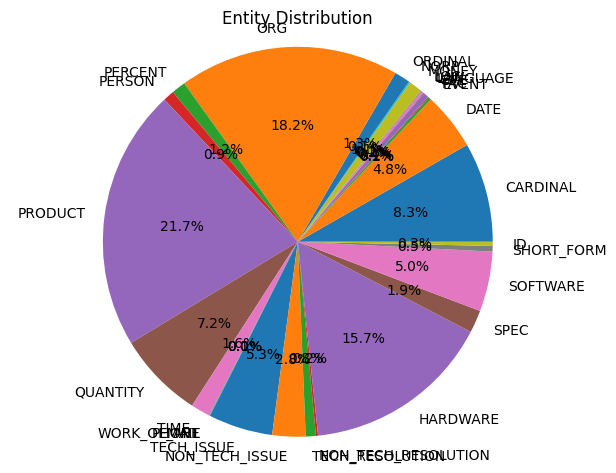

In [8]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(entity_counts.values(), labels=entity_counts.keys(), autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Entity Distribution")

plt.tight_layout() # add this line to adjust the layout
plt.savefig('entity_distribution.png', dpi=300, bbox_inches='tight') # add bbox_inches argument

plt.show()


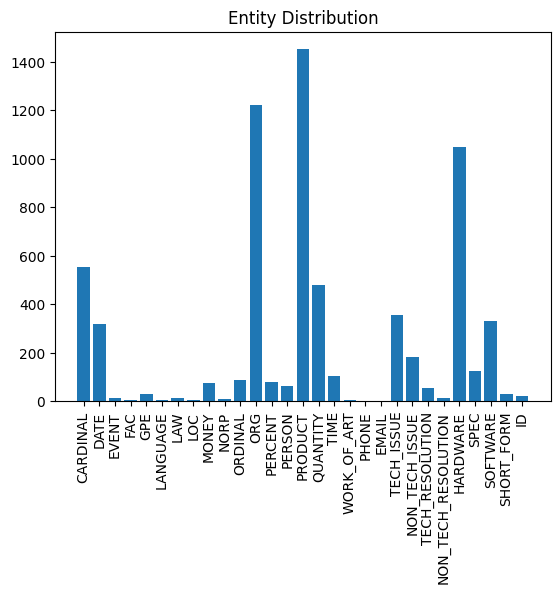

In [9]:
# Create a bar graph of the entity counts
fig2, ax2 = plt.subplots()
ax2.bar(entity_counts.keys(), entity_counts.values())
plt.xticks(rotation=90)
plt.title("Entity Distribution")
plt.show()